In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')
import numpy as np

In [2]:
import pandas as pd
from google.colab import files
data = files.upload()

Saving CovidData.csv to CovidData.csv


In [3]:
data = pd.read_csv("CovidData.csv")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

In [5]:
data.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [6]:
data[data['location']=='Chile']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
30791,CHL,South America,Chile,2020-02-23,2.0,2.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,205.0,1.3,-3.54,10.670213
30792,CHL,South America,Chile,2020-02-24,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
30793,CHL,South America,Chile,2020-02-25,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
30794,CHL,South America,Chile,2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
30795,CHL,South America,Chile,2020-02-27,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31528,CHL,South America,Chile,2022-03-01,3061019.0,0.0,23584.000,42353.0,0.0,118.143,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
31529,CHL,South America,Chile,2022-03-02,3098110.0,37091.0,25282.714,42411.0,58.0,120.000,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
31530,CHL,South America,Chile,2022-03-03,3122802.0,24692.0,24129.571,42683.0,272.0,126.857,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
31531,CHL,South America,Chile,2022-03-04,3147434.0,24632.0,23080.143,42809.0,126.0,127.143,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN


Text(0, 0.5, 'New cases')

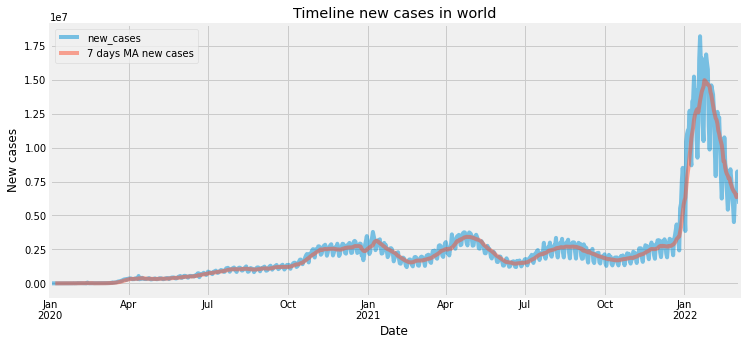

In [7]:
data2 = data.copy()
data2.date = pd.to_datetime(data2['date'])
data2 = data2.groupby('date').sum()
data2['7 days MA new cases'] = 0
data2['7 days MA new cases'] = data2['new_cases'].rolling(7).mean() #Moving average of new cases with window=10
data2['7 days MA new deaths'] = 0
data2['7 days MA new deaths'] = data2['new_deaths'].rolling(7).mean()  #Moving average of new deaths with window=10

data2[['new_cases', '7 days MA new cases']].plot(figsize = (11, 5), alpha = 0.5)
plt.title('Timeline new cases in world')
plt.xlabel('Date')
plt.ylabel('New cases')

Text(0, 0.5, 'New deaths')

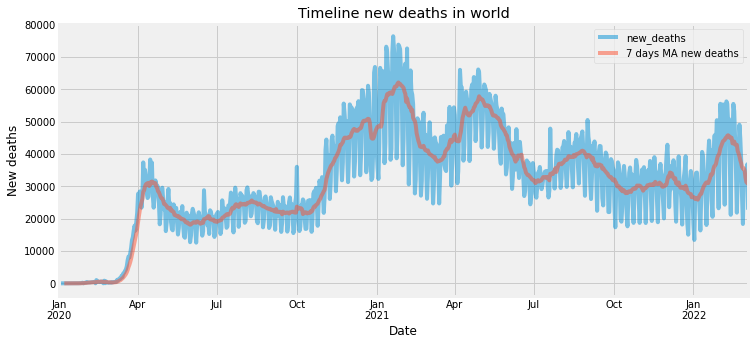

In [8]:
data2[['new_deaths', '7 days MA new deaths']].plot(figsize = (11, 5), alpha = 0.5)
plt.title('Timeline new deaths in world')
plt.xlabel('Date')
plt.ylabel('New deaths')

In [10]:
def create_and_plot_df(df, country):
    #Selecting the 7 key columns for country in dataset
    df=df[df['location']==country].copy()
    df=df[['date','total_cases','new_cases',
         'total_deaths','new_deaths',
         'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
         'new_deaths_per_million', 'new_cases_per_million']].copy()

    #Convert to datetime
    df.date = pd.to_datetime(df['date'])

    #Fixing the mistakes in chilean data.
    if country=='Chile':
        df.loc[df['date']=='2021-10-07','total_deaths'] = 37533
        df.loc[df['date']=='2021-10-07','new_deaths'] = 21
        df.loc[df['date']=='2021-10-08','new_deaths'] = 9
        df.loc[df['date']=='2021-10-07','new_deaths_per_million'] = 1.092
        df.loc[df['date']=='2021-10-08','new_deaths_per_million'] = 0.468
    else:
        pass
  
    #Fixing the mistakes in uk data.
    if country=='United Kingdom':
        df.loc[df['date']=='2022-01-31','new_cases'] = 92368
        df.loc[df['date']=='2022-02-01','new_deaths'] = 219
        df.loc[df['date']=='2022-01-31','new_cases_per_million'] = 1354
        df.loc[df['date']=='2022-02-01','new_deaths_per_million'] = 3.211
        df.loc[df['date']=='2021-04-09','new_cases'] = 3150
        df.loc[df['date']=='2021-04-09','new_cases_per_million'] = 46
        df.loc[df['date']=='2021-05-18','new_cases'] = 2412
        df.loc[df['date']=='2021-05-18','new_cases_per_million'] = 35
    else:
        pass
  
    #Set the date as index and compute moving average with window=7 for new_cases and new_deaths
    df.set_index('date', inplace=True)
    df['7 days MA new cases'] = 0
    df['7 days MA new cases'] = df['new_cases'].rolling(7).mean()
    df['7 days MA new deaths'] = 0
    df['7 days MA new deaths'] = df['new_deaths'].rolling(7).mean()
    df['7 days MA new cases per million'] = 0
    df['7 days MA new cases per million'] = df['new_cases_per_million'].rolling(7).mean()
    df['7 days MA new deaths per million'] = 0
    df['7 days MA new deaths per million'] = df['new_deaths_per_million'].rolling(7).mean()
  
    #Plot new cases, new deaths and people vaccinated 
    df[['new_cases', '7 days MA new cases']].plot(figsize = (15, 5), alpha = 0.5)
    plt.title(f'Timeline new cases in {country}')

    df[['new_deaths', '7 days MA new deaths']].plot(figsize = (15, 5), alpha = 0.5)
    if country=='Chile':
        plt.ylim([0,400])
    else:
        pass
    plt.title(f'Timeline new deaths in {country}')

    df[['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].plot(figsize = (15, 5), alpha = 0.5)
    plt.ylim([0,100])
    plt.fill_between(df.index, df.people_vaccinated_per_hundred)
    plt.fill_between(df.index, df.people_fully_vaccinated_per_hundred)
    plt.title(f'Timeline percentage of people vaccinated in {country}')
  
    #Return the dataframe processed
    return df

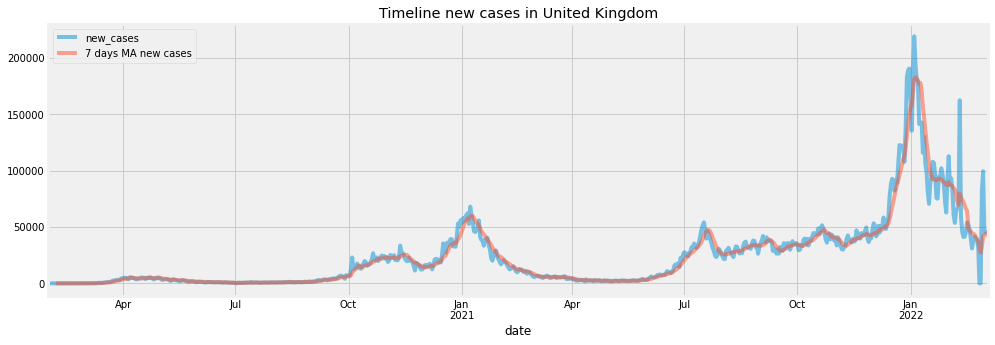

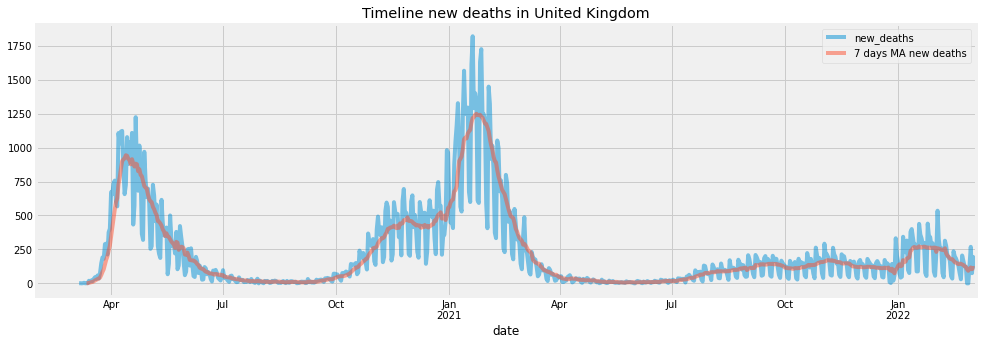

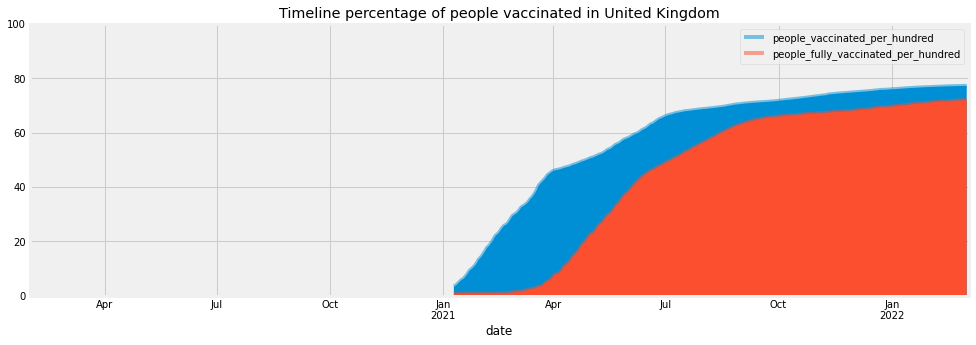

In [11]:
df_uk=create_and_plot_df(data, 'United Kingdom')

In [12]:
#df_uk

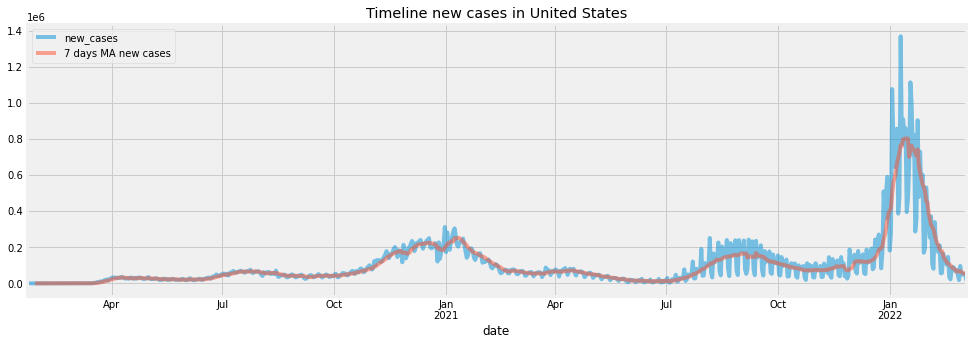

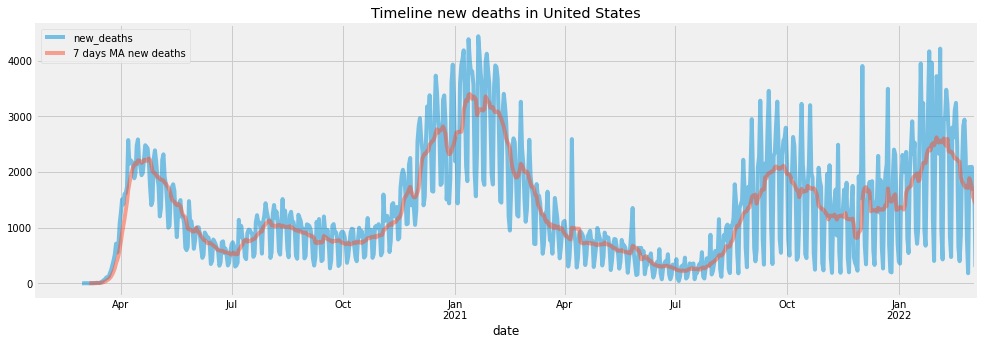

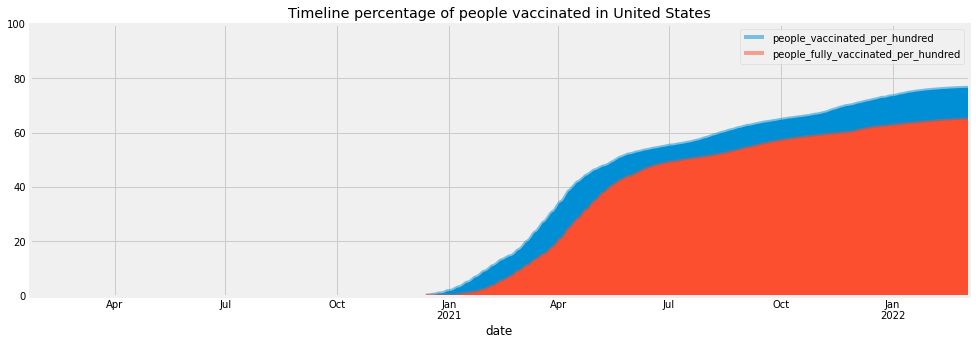

In [13]:
df_us=create_and_plot_df(data, 'United States')

In [14]:
#df_us

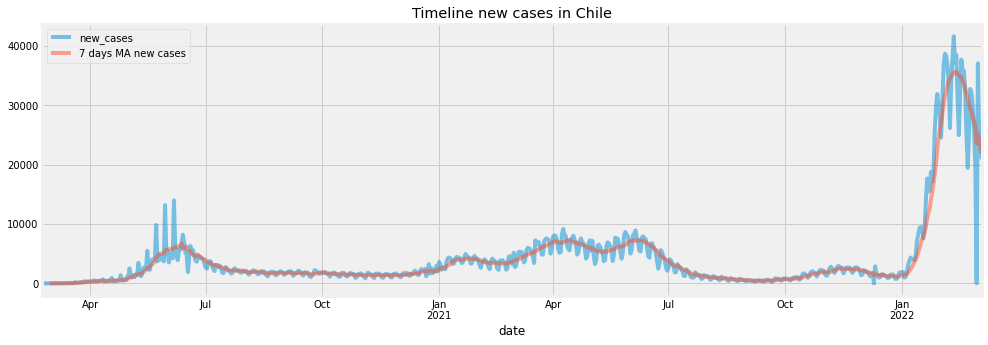

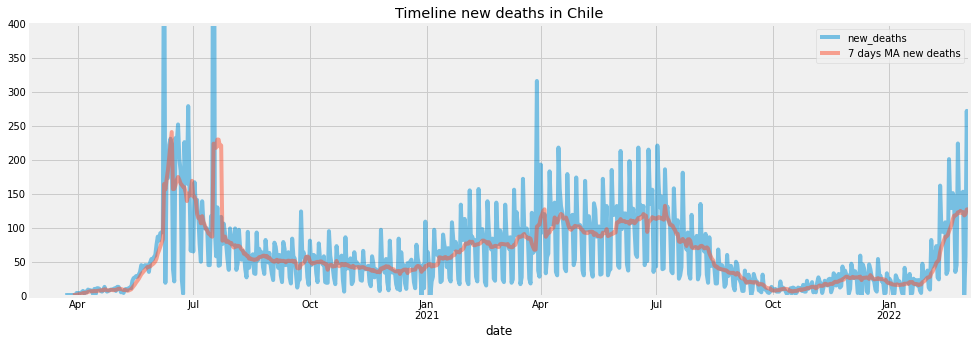

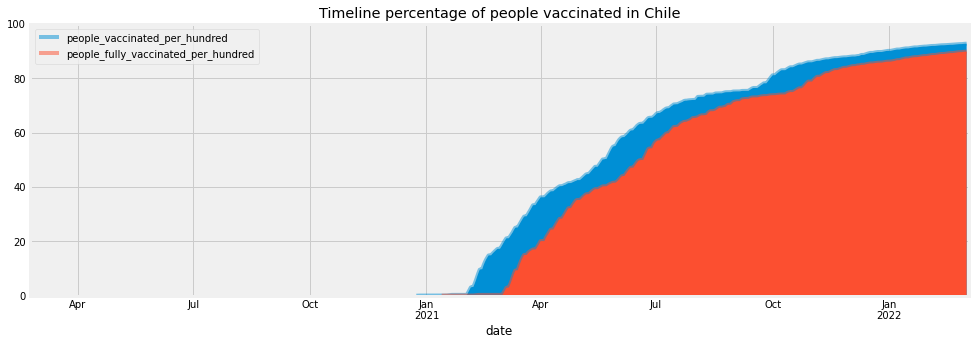

In [15]:
df_chile=create_and_plot_df(data, 'Chile')

In [16]:
df_chile

,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_deaths_per_million,new_cases_per_million,7 days MA new cases,7 days MA new deaths,7 days MA new cases per million,7 days MA new deaths per million
date,,,,,,,,,,,,
2020-02-23,2.0,2.0,NaN,NaN,NaN,NaN,NaN,0.104,NaN,NaN,NaN,NaN
2020-02-24,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
2020-02-25,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
2020-02-27,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,3061019.0,0.0,42353.0,0.0,92.66,89.76,0.000,0.000,23584.000000,118.142857,1227.542857,6.149286
2022-03-02,3098110.0,37091.0,42411.0,58.0,92.70,89.80,3.019,1930.580,25282.714286,120.000000,1315.960714,6.246000
2022-03-03,3122802.0,24692.0,42683.0,272.0,92.71,89.83,14.158,1285.214,24129.571429,126.857143,1255.939857,6.603000


In [17]:
df3_countries=pd.DataFrame()
df3_countries['New cases per million uk'] = df_uk['7 days MA new cases per million']
df3_countries['New cases per million us'] = df_us['7 days MA new cases per million']
df3_countries['New cases per million chile'] = df_chile['7 days MA new cases per million']
df3_countries['New deaths per million uk'] = df_uk['7 days MA new deaths per million']
df3_countries['New deaths per million us'] = df_us['7 days MA new deaths per million']
df3_countries['New deaths per million chile'] = df_chile['7 days MA new deaths per million']
df3_countries['date'] = df_uk.index
df3_countries.set_index('date', inplace=True)

df3_countries.head()

,New cases per million uk,New cases per million us,New cases per million chile,New deaths per million uk,New deaths per million us,New deaths per million chile
date,,,,,,
2020-01-31,NaN,0.002571,NaN,NaN,NaN,NaN
2020-02-01,NaN,0.002571,NaN,NaN,NaN,NaN
2020-02-02,NaN,0.001286,NaN,NaN,NaN,NaN
2020-02-03,NaN,0.002571,NaN,NaN,NaN,NaN
2020-02-04,NaN,0.002571,NaN,NaN,NaN,NaN


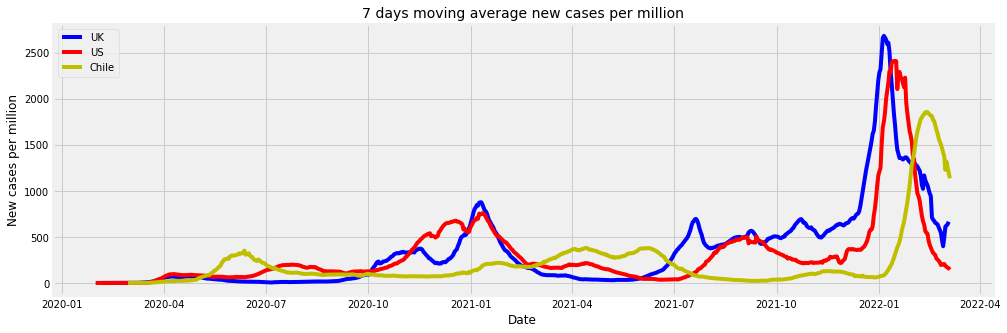

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(df3_countries.index, df3_countries['New cases per million uk'], "-b", label="UK")
plt.plot(df3_countries.index, df3_countries['New cases per million us'], "-r", label="US")
plt.plot(df3_countries.index, df3_countries['New cases per million chile'], "-y", label="Chile")
plt.legend(loc="upper left")
plt.title("7 days moving average new cases per million",fontsize=14)
plt.ylabel('New cases per million')
plt.xlabel('Date')
plt.show()

In [19]:
print('AUC New cases per million in the UK: ', df3_countries['New cases per million uk'].sum())
print('AUC New cases per million in the US: ', df3_countries['New cases per million us'].sum())
print('AUC New cases per million in Chile: ', df3_countries['New cases per million chile'].sum())

AUC New cases per million in the UK:  267811.3625714286
AUC New cases per million in the US:  237700.90657142858
AUC New cases per million in Chile:  161355.2457142857


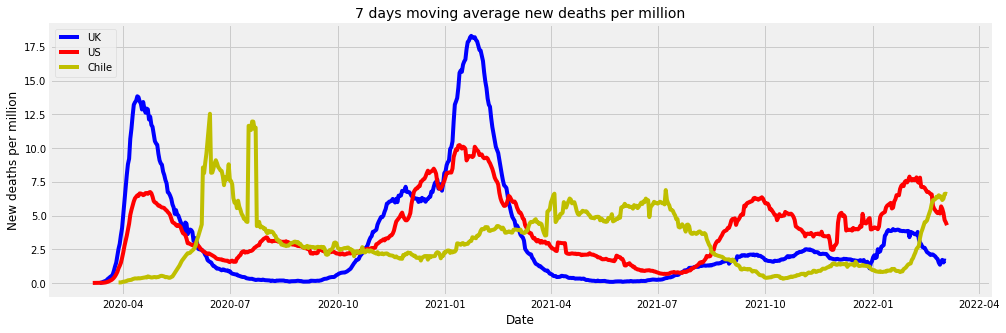

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(df3_countries.index, df3_countries['New deaths per million uk'], "-b", label="UK")
plt.plot(df3_countries.index, df3_countries['New deaths per million us'], "-r", label="US")
plt.plot(df3_countries.index, df3_countries['New deaths per million chile'], "-y", label="Chile")
plt.legend(loc="upper left")
plt.title("7 days moving average new deaths per million",fontsize=14)
plt.ylabel('New deaths per million')
plt.xlabel('Date')
plt.show()

In [21]:
print('AUC New deaths per million in the UK: ', df3_countries['New deaths per million uk'].sum())
print('AUC New deaths per million in the US: ', df3_countries['New deaths per million us'].sum())
print('AUC New deaths per million in Chile: ', df3_countries['New deaths per million chile'].sum())

AUC New deaths per million in the UK:  2357.771285714286
AUC New deaths per million in the US:  2866.079142857143
AUC New deaths per million in Chile:  2213.932142857142


In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_log_error
from keras.layers import SimpleRNN
import statistics
from tensorflow.keras.optimizers import Adam

In [23]:
def build_model(country_data, name_country):
  #Select the proper column and rows after 6 or 7 depending of the country: 
  new_df=country_data['7 days MA new cases']
  if name_country == 'USA':
    new_df=new_df[7:].copy()
  else:
    new_df=new_df[6:].copy()
  
  #Define the window of the RNN model and training set at 80%:
  window=10
  train_len = math.ceil(len(new_df)*0.8)
  train_data = new_df[0:train_len]
  X_train=[]
  Y_train=[]
  for i in range(window, len(train_data)):
      X_train.append(train_data[i-window:i])
      Y_train.append(train_data[i])
  
  X_train, Y_train= np.array(X_train), np.array(Y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

  #Define validation set at remaining 20%
  test_data = new_df[train_len-window:]
  X_val=[]
  Y_val=[] 
  for i in range(window, len(test_data)):
      X_val.append(test_data[i-window:i])
      Y_val.append(test_data[i])

  X_val, Y_val = np.array(X_val), np.array(Y_val)
  X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

  #Build the RNN network and train with proper set: 
  r1=[]
  r2=[]
  model=Sequential()
  model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
  model.add(Dense(100))
  model.add(Dense(25))
  model.add(Dense(1))
  opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
  model.compile(loss='mean_squared_error', optimizer=opt1)
  model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)

  #Predict the label for train and validation sets, then compute RMSLE for both:
  lstm_train_pred = model.predict(X_train)
  lstm_valid_pred = model.predict(X_val)
  lstm_train_pred[lstm_train_pred<0] = 0    #As we will compute logaritmic the argument must be greater or equal to 0
  lstm_valid_pred[lstm_valid_pred<0] = 0
  print('RMSLE train set: ', np.round(np.sqrt(mean_squared_log_error(Y_train, lstm_train_pred)),3))
  print('RMSLE validation set: ', np.round(np.sqrt(mean_squared_log_error(Y_val, lstm_valid_pred)),3))
    
  #Create new dataframe including actual validation data and predicted validation:
  valid = pd.DataFrame(new_df[train_len:])
  valid['Predictions'] = model.predict(X_val)

  #Plot the both curves:
  plt.figure(figsize=(16,8))
  plt.title(f'Validation and predicted values by RNN model in {name_country}')
  plt.xlabel('Date')
  plt.ylabel('New cases')
  plt.plot(valid[['7 days MA new cases','Predictions']])
  plt.legend(['Validation','Predictions'])
  plt.show()

  #Return the new dataframe without NaN values, the model built and validation dataframe:
  return new_df.copy(), model, valid

In [24]:
def future_values(model, future_df, days, name_country):
  #Loop for number of "days" to forecast:
  for i in range(1,days+1,1):
    #Take the last 10 days from the dataframe:
    last_10_days=future_df[-10:].values
    X_test=[]
    X_test.append(last_10_days)
    X_test=np.array(X_test)
    #Reshape properly to be used by the model:
    X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
    #Predict the one day in future given 10 days:
    pred_new_cases=model.predict(X_test)
    #Create the date for the forecasted value:
    idx = pd.date_range(future_df.index[-1], periods=2, freq='D')[1:]
    #Append such value to the actual dataframe and use this new dataframe to compute a new future value:
    future_df=future_df.append(pd.Series(pred_new_cases[0][0], index=idx)).copy()
  
  #Plot the up to date values in blue and forecasted values in red:
  plt.figure(figsize=(16,8))
  plt.title(f'Historic values and forecasting of future values in {name_country}')
  plt.xlabel('Date')
  plt.ylabel('New cases')
  plt.plot(future_df[:-days])
  plt.plot(future_df[-days:])
  plt.legend(['Historic values','Forecast'])
  plt.show()
 
 #Return the created dataframe including actual validation values and forecasted values.
  return future_df

In [25]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

RMSLE train set:  0.148
RMSLE validation set:  0.05


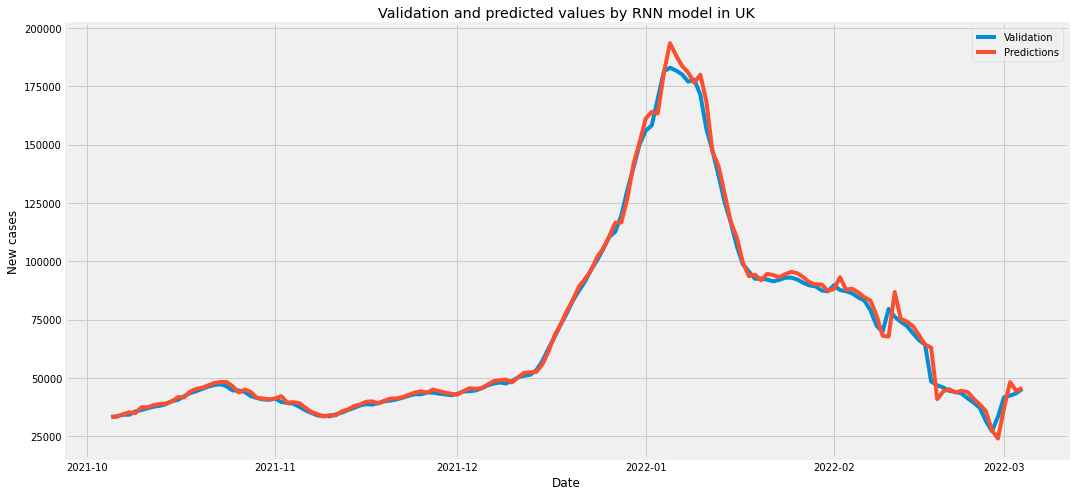

In [26]:
df_uk_cut, model_uk, valid_df_uk = build_model(df_uk[:-1], 'UK')

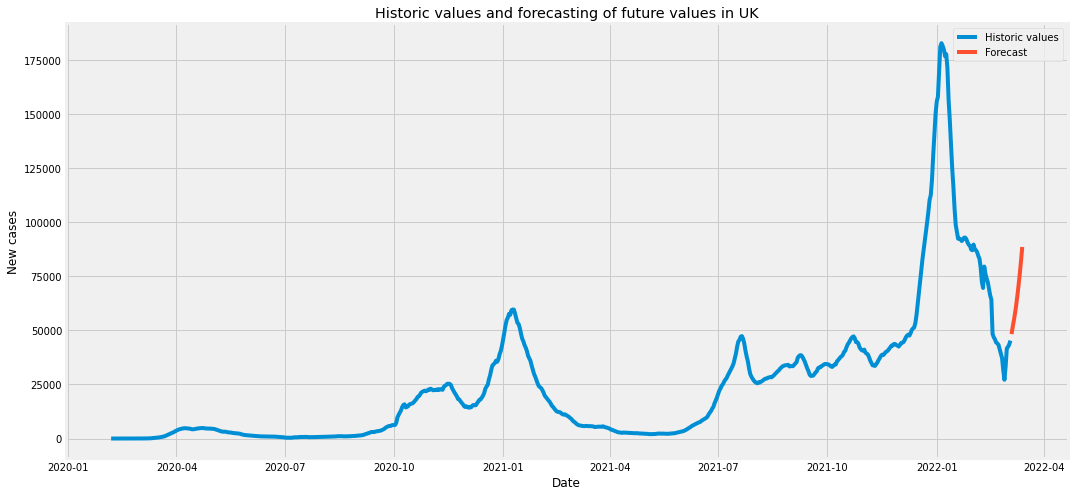

In [27]:
forecasting_uk = future_values(model_uk, df_uk_cut, 10, 'UK')

In [28]:
forecasting_uk

2020-02-06        1.285714
2020-02-07        1.000000
2020-02-08        1.571429
2020-02-09        1.714286
2020-02-10        0.857143
                  ...     
2022-03-10    66586.210938
2022-03-11    71437.289062
2022-03-12    76691.757812
2022-03-13    82399.632812
2022-03-14    88628.132812
Length: 768, dtype: float64

RMSLE train set:  0.08
RMSLE validation set:  0.052


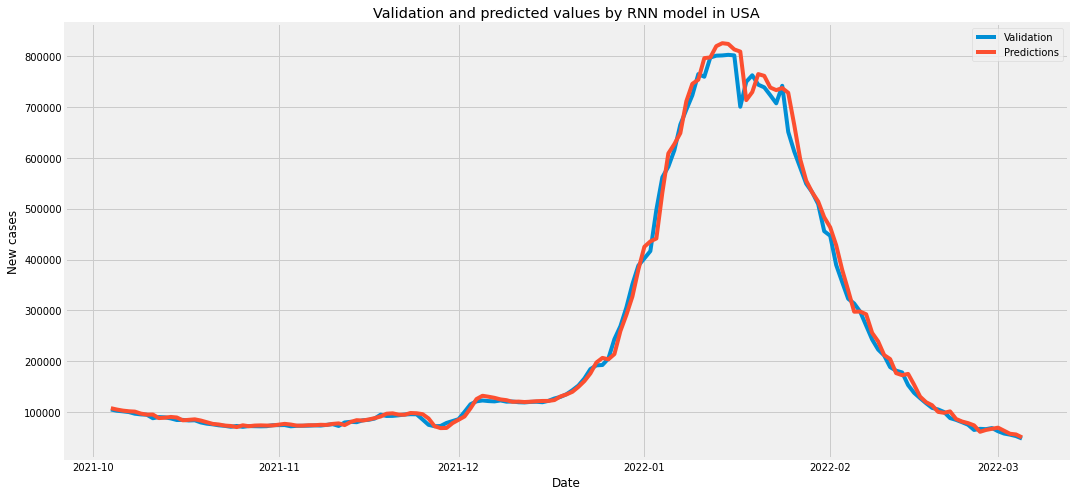

In [29]:
df_us_cut, model_us, valid_df_us = build_model(df_us, 'USA')

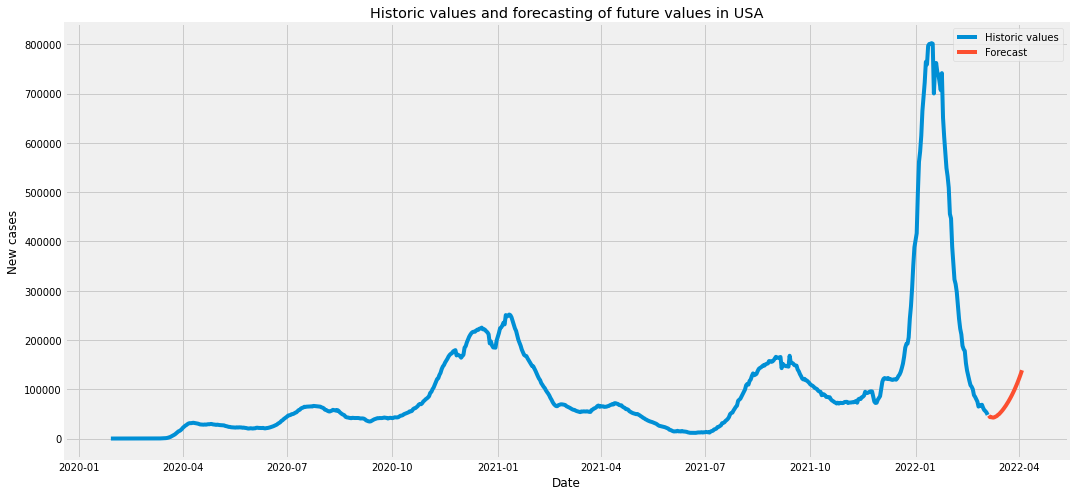

In [30]:
forecasting_us = future_values(model_us, df_us_cut, 30, 'USA')

RMSLE train set:  0.056
RMSLE validation set:  0.05


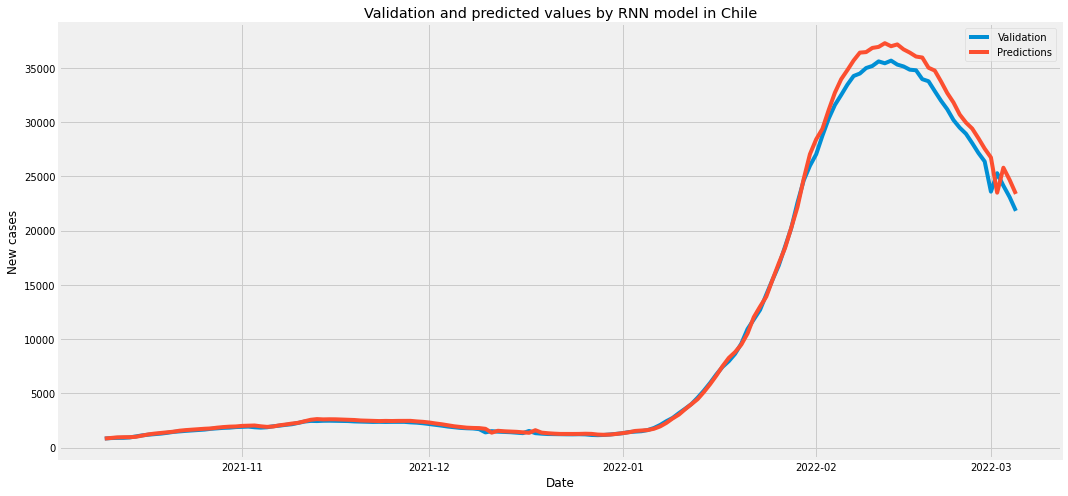

In [31]:
df_chile_cut, model_chile, valid_df_chile = build_model(df_chile, 'Chile')

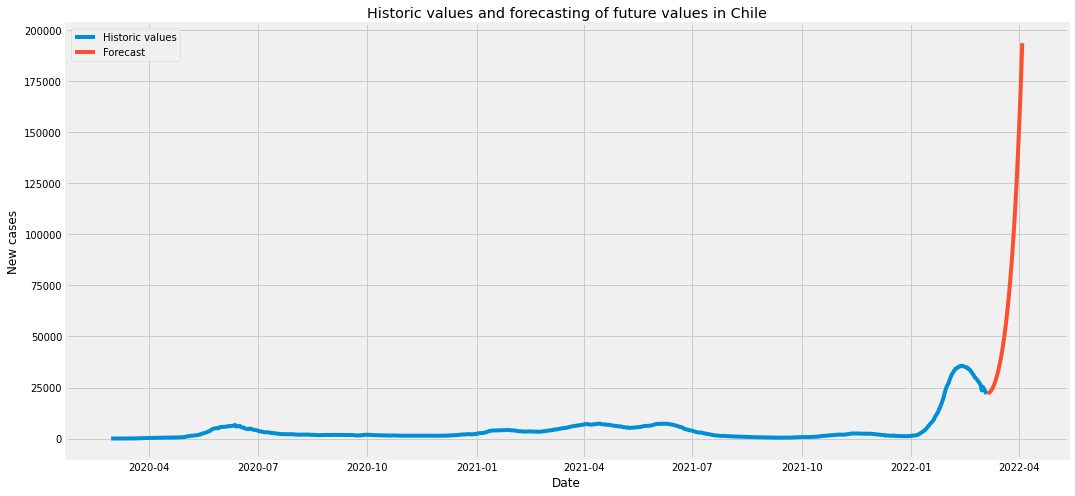

In [32]:
forecasting_chile = future_values(model_chile, df_chile_cut, 30, 'Chile')